# Feature Engineering
This notebook contains the code for feature engineering. This notebook should/does not include any functions for cleaning or analysing the data set. 

Made by: Yari Anrango

Date: 16/04/23


Based on the correlation plot in the previous step, it appears that mood only has some correlation with valence. We will try to do some alterations to improve this.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('./knn_imputed_data.csv', index_col = 'time' ,parse_dates=['time'])

In [148]:
data.head()

,Unnamed: 0,id,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,...,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,screen,sms,circumplex.arousal,circumplex.valence,mood
time,,,,,,,,,,,,,,,,,,,,,
2014-03-21,0,AS14.01,0.243295,0.447549,0.434987,0.119466,0.039790,0.0,0.035532,0.065960,...,0.326282,0.000000,0.272236,0.000000,0.193548,0.856057,0.000000,0.550,0.420290,0.533333
2014-03-22,1,AS14.01,0.328776,0.117903,0.343701,0.011066,0.016927,0.0,0.000000,0.027001,...,0.014135,0.000000,0.065417,0.000000,0.096774,0.316896,0.058824,0.650,0.516908,0.566667
2014-03-23,2,AS14.01,0.185734,0.175857,0.338892,0.011188,0.034858,0.0,0.000000,0.020035,...,0.000000,0.000000,0.016733,0.092875,0.000000,0.349480,0.000000,0.550,0.613527,0.633333
2014-03-24,3,AS14.01,0.164390,0.169103,0.580359,0.115851,0.027391,0.0,0.000632,0.018311,...,0.155037,0.000000,0.095643,0.000000,0.322581,0.776345,0.000000,0.600,0.355878,0.500000
2014-03-25,4,AS14.01,0.204806,0.168532,0.618168,0.008088,0.034578,0.0,0.000000,0.049196,...,0.000000,0.088728,0.123966,0.000000,0.000000,0.848311,0.058824,0.625,0.516908,0.625000


In [4]:
data = data.drop('Unnamed: 0', axis = 1)

Make sure that the dataframe is sorted correctly

In [5]:
data = data.sort_values(by = ['id','time'])
data.head()

,id,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,screen,sms,circumplex.arousal,circumplex.valence,mood
time,,,,,,,,,,,,,,,,,,,,
2014-03-21,AS14.01,0.243295,0.447549,0.434987,0.119466,0.039790,0.0,0.035532,0.065960,0.176723,0.326282,0.000000,0.272236,0.000000,0.193548,0.856057,0.000000,0.550,0.420290,0.533333
2014-03-22,AS14.01,0.328776,0.117903,0.343701,0.011066,0.016927,0.0,0.000000,0.027001,0.017233,0.014135,0.000000,0.065417,0.000000,0.096774,0.316896,0.058824,0.650,0.516908,0.566667
2014-03-23,AS14.01,0.185734,0.175857,0.338892,0.011188,0.034858,0.0,0.000000,0.020035,0.035311,0.000000,0.000000,0.016733,0.092875,0.000000,0.349480,0.000000,0.550,0.613527,0.633333
2014-03-24,AS14.01,0.164390,0.169103,0.580359,0.115851,0.027391,0.0,0.000632,0.018311,0.126365,0.155037,0.000000,0.095643,0.000000,0.322581,0.776345,0.000000,0.600,0.355878,0.500000
2014-03-25,AS14.01,0.204806,0.168532,0.618168,0.008088,0.034578,0.0,0.000000,0.049196,0.075239,0.000000,0.088728,0.123966,0.000000,0.000000,0.848311,0.058824,0.625,0.516908,0.625000


As for the attributes, we will use some form of aggregation to make more common algorithms work with the data set. In this case we will calculate the moving average for some k days per attribute. As for now, we use k = 5 days for the aggregation. We will also remove the mood from this calculation because otherwise the model will predict the average mood of the past 5 days and not the mood of the day chosen.

In [6]:
mood = data[['id','mood']]
data = data.drop('mood', axis = 1)
data_agg = data.groupby('id').rolling('5D').mean()
data_agg.head()

activity  appCat.builtin  appCat.communication  \
id      time                                                         
AS14.01 2014-03-21  0.243295        0.447549              0.434987   
        2014-03-22  0.286036        0.282726              0.389344   
        2014-03-23  0.252602        0.247103              0.372527   
        2014-03-24  0.230549        0.227603              0.424485   
        2014-03-25  0.225400        0.215789              0.463221   

                    appCat.entertainment  appCat.finance  appCat.game  \
id      time                                                            
AS14.01 2014-03-21              0.119466        0.039790          0.0   
        2014-03-22              0.065266        0.028358          0.0   
        2014-03-23              0.047240        0.030525          0.0   
        2014-03-24              0.064393        0.029742          0.0   
        2014-03-25              0.053132        0.030709          0.0   

                    appCat.office  appCat.other  appCat.social  appCat.travel  \
id      time                                                                    
AS14.01 2014-03-21       0.035532      0.065960       0.176723       0.326282   
        2014-03-22       0.017766      0.046480       0.096978       0.170209   
        2014-03-23       0.011844      0.037665       0.076422       0.113473   
        2014-03-24       0.009041      0.032827       0.088908       0.123864   
        2014-03-25       0.007233      0.036101       0.086174       0.099091   

                    appCat.unknown  appCat.utilities  appCat.weather  \
id      time                                                           
AS14.01 2014-03-21        0.000000          0.272236        0.000000   
        2014-03-22        0.000000          0.168827        0.000000   
        2014-03-23        0.000000          0.118129        0.030958   
        2014-03-24        0.000000          0.112507        0.023219   
        2014-03-25        0.017746          0.114799        0.018575   

                        call    screen       sms  circumplex.arousal  \
id      time                                                           
AS14.01 2014-03-21  0.193548  0.856057  0.000000            0.550000   
        2014-03-22  0.145161  0.586476  0.029412            0.600000   
        2014-03-23  0.096774  0.507477  0.019608            0.583333   
        2014-03-24  0.153226  0.574694  0.014706            0.587500   
        2014-03-25  0.122581  0.629418  0.023529            0.595000   

                    circumplex.valence  
id      time                            
AS14.01 2014-03-21            0.420290  
        2014-03-22            0.468599  
        2014-03-23            0.516908  
        2014-03-24            0.476651  
        2014-03-25            0.484702

In [7]:
result_df = mood.reset_index().copy()
result_df = result_df.merge(data_agg.reset_index())
result_df.head()

,time,id,mood,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,...,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,screen,sms,circumplex.arousal,circumplex.valence
0,2014-03-21,AS14.01,0.533333,0.243295,0.447549,0.434987,0.119466,0.039790,0.0,0.035532,...,0.176723,0.326282,0.000000,0.272236,0.000000,0.193548,0.856057,0.000000,0.550000,0.420290
1,2014-03-22,AS14.01,0.566667,0.286036,0.282726,0.389344,0.065266,0.028358,0.0,0.017766,...,0.096978,0.170209,0.000000,0.168827,0.000000,0.145161,0.586476,0.029412,0.600000,0.468599
2,2014-03-23,AS14.01,0.633333,0.252602,0.247103,0.372527,0.047240,0.030525,0.0,0.011844,...,0.076422,0.113473,0.000000,0.118129,0.030958,0.096774,0.507477,0.019608,0.583333,0.516908
3,2014-03-24,AS14.01,0.500000,0.230549,0.227603,0.424485,0.064393,0.029742,0.0,0.009041,...,0.088908,0.123864,0.000000,0.112507,0.023219,0.153226,0.574694,0.014706,0.587500,0.476651
4,2014-03-25,AS14.01,0.625000,0.225400,0.215789,0.463221,0.053132,0.030709,0.0,0.007233,...,0.086174,0.099091,0.017746,0.114799,0.018575,0.122581,0.629418,0.023529,0.595000,0.484702


In [ ]:
result_df.to_csv('feature_engineered_data.csv')

# PCA

The next is removing attributes that are not necessary. We will use Principal Component Analysis to reduce the amount of features.


In [33]:
X = result_df.drop(['time','id'], axis = 1)
pca = PCA()
dat = pca.fit_transform(X)

In [34]:
explained_variance = pca.explained_variance_ratio_
var_dat = pd.DataFrame({'variance':explained_variance})

<BarContainer object of 19 artists>

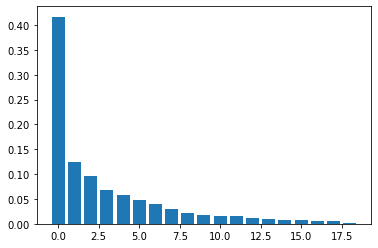

In [35]:
plt.bar(var_dat.index,var_dat['variance'])

In [38]:
var_dat.cumsum()

,variance
0,0.417038
1,0.542189
2,0.637737
3,0.705010
4,0.763376
5,0.810705
6,0.850509
7,0.881107
8,0.903416
9,0.921393


Since no clear drop-off point can be found, we use the amount of components from when it reaches 90%, which is at 8.

In [54]:
pca = PCA(n_components = 12)
components = result_df.drop(['id','time'], axis = 1)
components = pca.fit_transform(components)
mood = result_df[['mood']]


In [55]:
dat_pca = pd.concat([pd.DataFrame(components), mood], axis = 1)

In [56]:
dat_pca

,0,1,2,3,4,5,6,7,8,9,10,11,mood
0,0.699716,0.246129,0.116635,-0.273108,-0.062836,0.040740,0.079696,0.002588,-0.043754,0.073418,-0.266104,0.087415,0.533333
1,0.400494,0.135455,0.137094,-0.179559,0.033187,0.118881,0.067689,0.009766,-0.055018,0.026952,-0.124208,0.070269,0.566667
2,0.309390,0.055626,0.096834,-0.149769,0.003255,0.131676,0.035541,-0.002411,-0.063246,0.015687,-0.078657,0.049075,0.633333
3,0.362123,0.172488,0.064722,-0.195087,0.076621,0.157589,0.061462,0.044569,-0.062924,0.063388,-0.097793,0.050759,0.500000
4,0.412171,0.071362,0.044727,-0.204008,0.015729,0.201462,0.090661,0.010865,-0.064298,0.055714,-0.069057,0.055631,0.625000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,0.106461,0.255451,-0.101369,-0.003025,-0.066937,-0.052508,0.041390,-0.072941,0.066249,0.070556,0.021867,0.015090,0.533333
1298,0.205367,-0.019991,-0.025526,0.027734,-0.247806,-0.045668,0.115463,-0.057711,0.075130,0.078043,0.032218,-0.004510,0.866667
1299,0.142888,0.103533,0.017775,0.078470,-0.115158,-0.049788,0.014795,0.001918,0.099241,0.087850,0.027452,0.005857,0.666667
1300,0.172702,0.157772,0.036606,0.075103,-0.105930,-0.060349,0.037713,-0.012755,0.085252,0.084990,-0.039318,-0.005066,0.633333


In [57]:
dat_pca.to_csv('pca_dat.csv')